In [1]:
#pip install keras
#pip install tensorflow
#pip install opencv-python

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras.optimizers.legacy import Adam 
from keras.utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator 
import pickle 
import pandas as pd 
import random 
import cv2 

In [4]:
# Read data 
data = pd.read_csv("TrafficSign/signnames.csv") 

with open('TrafficSign/train.p', 'rb') as f: train_data = pickle.load(f) 
with open('TrafficSign/valid.p', 'rb') as f: val_data = pickle.load(f) 
with open('TrafficSign/test.p', 'rb') as f: test_data = pickle.load(f) 

# Extracting the labels from the dictionaries 
X_train, y_train = train_data['features'], train_data['labels'] 
X_val, y_val = val_data['features'], val_data['labels'] 
X_test, y_test = test_data['features'], test_data['labels'] 

# Printing the shapes 
print(X_train.shape) 
print(X_val.shape) 
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [5]:
def preprocessing(img): 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.equalizeHist(img) 
    img = img / 255
    return img 

X_train = np.array(list(map(preprocessing, X_train))) 
X_val = np.array(list(map(preprocessing, X_val))) 
X_test = np.array(list(map(preprocessing, X_test))) 

X_train = X_train.reshape(34799, 32, 32, 1) 
X_val = X_val.reshape(4410, 32, 32, 1) 
X_test = X_test.reshape(12630, 32, 32, 1) 

In [6]:
datagen = ImageDataGenerator(width_shift_range = 0.1, 
                             height_shift_range = 0.1, 
                             zoom_range = 0.2, 
                             shear_range = 0.1, 
                             rotation_range = 10) 
datagen.fit(X_train)

y_train = to_categorical(y_train, 43) 
y_val = to_categorical(y_val, 43) 
y_test = to_categorical(y_test, 43) 

In [7]:
num_classes = 43

def cnn_model(): 
    model = Sequential() 
    model.add(Conv2D(60, (5, 5), 
                     input_shape =(32, 32, 1), 
                     activation ='relu')) 

    model.add(Conv2D(60, (5, 5), activation ='relu')) 
    model.add(MaxPooling2D(pool_size =(2, 2))) 

    model.add(Conv2D(30, (3, 3), activation ='relu')) 
    model.add(Conv2D(30, (3, 3), activation ='relu')) 
    model.add(MaxPooling2D(pool_size =(2, 2))) 

    model.add(Flatten()) 
    model.add(Dense(500, activation ='relu')) 
    model.add(Dropout(0.5)) 
    model.add(Dense(num_classes, activation ='softmax')) 

    # Compile model 
    model.compile(Adam(learning_rate = 0.001), 
                       loss ='categorical_crossentropy', 
                       metrics =['accuracy']) 
    return model 

model = cnn_model() 
history = model.fit(datagen.flow(X_train, y_train, 
                                 batch_size = 50), 
                                 steps_per_epoch = len(X_train) // 50, 
                                 epochs = 10, 
                                 validation_data =(X_val, y_val), 
                                 shuffle = True) 

Epoch 1/10
695/695 [==============================] - 59s 84ms/step - loss: 1.7598 - accuracy: 0.4975 - val_loss: 0.3356 - val_accuracy: 0.9059
Epoch 2/10
695/695 [==============================] - 65s 94ms/step - loss: 0.6153 - accuracy: 0.8109 - val_loss: 0.2102 - val_accuracy: 0.9261
Epoch 3/10
695/695 [==============================] - 67s 96ms/step - loss: 0.3592 - accuracy: 0.8891 - val_loss: 0.1005 - val_accuracy: 0.9671
Epoch 4/10
695/695 [==============================] - 68s 98ms/step - loss: 0.2623 - accuracy: 0.9182 - val_loss: 0.0528 - val_accuracy: 0.9828
Epoch 5/10
695/695 [==============================] - 72s 104ms/step - loss: 0.2036 - accuracy: 0.9363 - val_loss: 0.0531 - val_accuracy: 0.9841
Epoch 6/10
695/695 [==============================] - 73s 105ms/step - loss: 0.1809 - accuracy: 0.9437 - val_loss: 0.0631 - val_accuracy: 0.9812
Epoch 7/10
695/695 [==============================] - 74s 107ms/step - loss: 0.1587 - accuracy: 0.9520 - val_loss: 0.0317 - val_accura

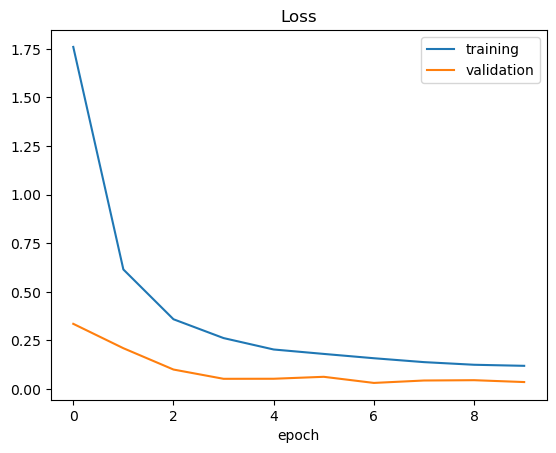

In [8]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['training', 'validation']) 
plt.title('Loss') 
plt.xlabel('epoch') 
plt.show()

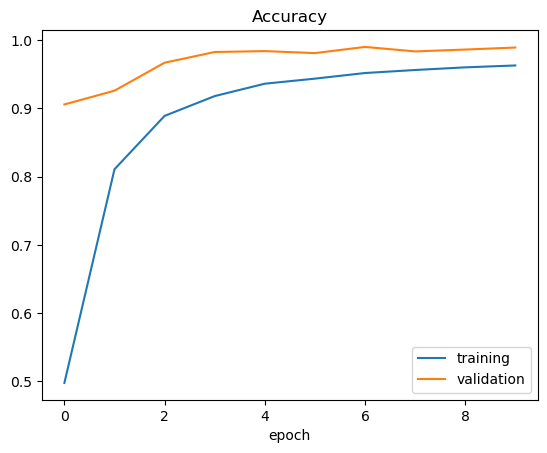

In [9]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.legend(['training', 'validation']) 
plt.title('Accuracy') 
plt.xlabel('epoch') 
plt.show()

In [10]:
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test Loss: ', score[0]) 
print('Test Accuracy: ', score[1]) 

Test Loss:  0.126514732837677
Test Accuracy:  0.9669042229652405


In [13]:
class_labels = [
    "Speed limit (20km/h)",
    "Speed limit (30km/h)",
    "Speed limit (50km/h)",
    "Speed limit (60km/h)",
    "Speed limit (70km/h)",
    "Speed limit (80km/h)",
    "End of speed limit (80km/h)",
    "Speed limit (100km/h)",
    "Speed limit (120km/h)",
    "No passing",
    "No passing for vechiles over 3.5 metric tons",
    "Right-of-way at the next intersection",
    "Priority road",
    "Yield",
    "Stop",
    "No vechiles",
    "Vechiles over 3.5 metric tons prohibited",
    "No entry",
    "General caution",
    "Dangerous curve to the left",
    "Dangerous curve to the right",
    "Double curve",
    "Bumpy road",
    "Slippery road",
    "Road narrows on the right",
    "Road work",
    "Traffic signals",
    "Pedestrians",
    "Children crossing",
    "Bicycles crossing",
    "Beware of ice/snow",
    "Wild animals crossing",
    "End of all speed and passing limits",
    "Turn right ahead",
    "Turn left ahead",
    "Ahead only",
    "Go straight or right",
    "Go straight or left",
    "Keep right",
    "Keep left",
    "Roundabout mandatory",
    "End of no passing",
    "End of no passing by vechiles over 3.5 metric tons"
]

class_labels_dict = {i: label for i, label in enumerate(class_labels)}

1/1 [==============================] - 0s 16ms/step
Predicted sign: Speed limit (30km/h)


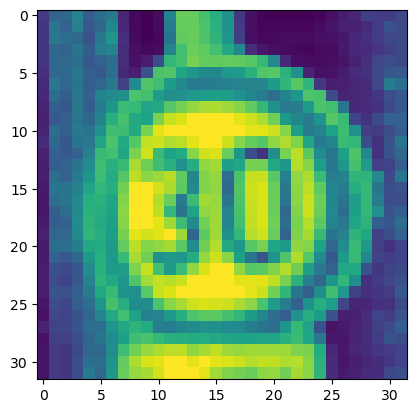

In [14]:
plt.imshow(X_test[1].reshape(32, 32)) 
predicted_probabilities = model.predict(X_test[1].reshape(1, 32, 32, 1))
predicted_class = np.argmax(predicted_probabilities)
predicted_sign_name = class_labels_dict.get(predicted_class, 'Unknown')

print(f"Predicted sign: {predicted_sign_name}")

1/1 [==============================] - 0s 18ms/step
Predicted sign: Turn right ahead


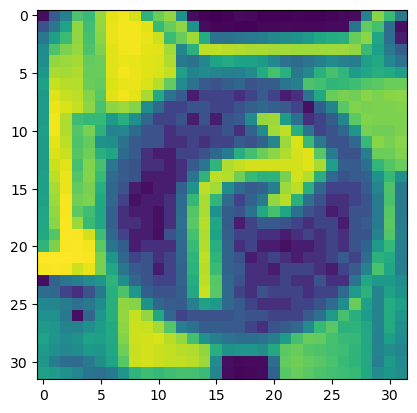

In [21]:
plt.imshow(X_test[21].reshape(32, 32)) 
predicted_probabilities = model.predict(X_test[21].reshape(1, 32, 32, 1))
predicted_class = np.argmax(predicted_probabilities)
predicted_sign_name = class_labels_dict.get(predicted_class, 'Unknown')

print(f"Predicted sign: {predicted_sign_name}")

1/1 [==============================] - 0s 18ms/step
Predicted sign: Stop


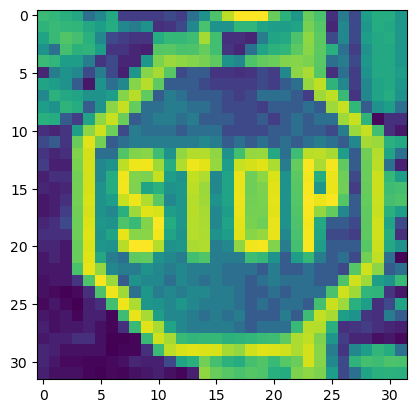

In [26]:
plt.imshow(X_test[111].reshape(32, 32)) 
predicted_probabilities = model.predict(X_test[111].reshape(1, 32, 32, 1))
predicted_class = np.argmax(predicted_probabilities)
predicted_sign_name = class_labels_dict.get(predicted_class, 'Unknown')

print(f"Predicted sign: {predicted_sign_name}")